# 📈 Chapter 6 练习 2: A/B 测试增强 - CUPED 方差缩减

## A/B 测试的痛点

你是一家视频平台的数据科学家，要测试新推荐算法对观看时长的影响：

- 实验跑了 2 周
- 处理组观看时长增加了 5 分钟
- p-value = 0.08...不显著！

老板问：「要不要继续跑？还要跑多久？」

这时候，**CUPED** 来帮忙了！

---

## 🎯 学习目标

1. 理解 CUPED 方差缩减技术
2. 掌握 ATE 估计和显著性检验
3. 学习异质效应 (HTE) 分析
4. 理解统计功效和样本量规划

## 🌟 CUPED 的直觉

### 为什么 A/B 测试需要大样本？

因为用户之间差异太大！

- 用户 A: 每天看 3 小时视频
- 用户 B: 每天看 10 分钟视频

这种**个体差异**导致指标方差很大，需要更多样本才能检测到效应。

### CUPED 的思路

如果我们知道用户**实验前**的观看时长，可以「去除」个体差异！

```
原始观察值 = 个体基线 + 处理效应 + 噪声
调整后值  = 处理效应 + 噪声  (去除个体基线)
```

### 类比

想象测量减肥药效果：
- **传统方法**: 比较吃药组和不吃药组的体重
- **CUPED**: 比较吃药组和不吃药组的**体重变化**（已知实验前体重）

后者方差更小，因为去除了「有些人本来就胖」的个体差异！

## 📐 核心公式

### CUPED 调整

$$Y_{\text{adjusted}} = Y - \theta \cdot (X_{\text{pre}} - \bar{X}_{\text{pre}})$$

其中：
$$\theta = \frac{\text{Cov}(Y, X_{\text{pre}})}{\text{Var}(X_{\text{pre}})}$$

### 方差缩减率

$$\text{Variance Reduction} = \rho^2$$

其中 $\rho$ 是 $Y$ 和 $X_{\text{pre}}$ 的相关系数。

**关键洞察**: 如果 $Y$ 和 $X_{\text{pre}}$ 相关性越高，方差缩减越多！

---

## 📐 CUPED 核心数学推导

### 推导 1: CUPED 方差缩减公式

**目标**: 证明 CUPED 调整后的方差为 $\text{Var}(Y_{cuped}) = \text{Var}(Y)(1 - \rho^2)$

**CUPED 公式**:
$$Y_{cuped} = Y - \theta(X - \bar{X})$$

其中 $\theta$ 是待定系数。

**步骤 1: 计算方差**

$$\text{Var}(Y_{cuped}) = \text{Var}(Y - \theta(X - \bar{X}))$$

由于 $\bar{X}$ 是常数：

$$= \text{Var}(Y - \theta X)$$

**步骤 2: 展开方差**

$$= \text{Var}(Y) + \theta^2 \text{Var}(X) - 2\theta \text{Cov}(Y, X)$$

**步骤 3: 找最优 θ**

对 $\theta$ 求导并令其为 0：

$$\frac{\partial}{\partial \theta} \text{Var}(Y_{cuped}) = 2\theta \text{Var}(X) - 2\text{Cov}(Y, X) = 0$$

解得：

$$\theta^* = \frac{\text{Cov}(Y, X)}{\text{Var}(X)}$$

这正是线性回归的系数！

**步骤 4: 代入最优 θ 计算方差**

$$\text{Var}(Y_{cuped}) = \text{Var}(Y) + \left(\frac{\text{Cov}(Y, X)}{\text{Var}(X)}\right)^2 \text{Var}(X) - 2 \frac{\text{Cov}(Y, X)}{\text{Var}(X)} \text{Cov}(Y, X)$$

$$= \text{Var}(Y) + \frac{\text{Cov}(Y, X)^2}{\text{Var}(X)} - 2\frac{\text{Cov}(Y, X)^2}{\text{Var}(X)}$$

$$= \text{Var}(Y) - \frac{\text{Cov}(Y, X)^2}{\text{Var}(X)}$$

**步骤 5: 引入相关系数**

相关系数定义为：

$$\rho = \frac{\text{Cov}(Y, X)}{\sqrt{\text{Var}(Y) \cdot \text{Var}(X)}}$$

因此：

$$\text{Cov}(Y, X)^2 = \rho^2 \text{Var}(Y) \text{Var}(X)$$

代入：

$$\text{Var}(Y_{cuped}) = \text{Var}(Y) - \frac{\rho^2 \text{Var}(Y) \text{Var}(X)}{\text{Var}(X)}$$

$$= \text{Var}(Y) - \rho^2 \text{Var}(Y)$$

$$= \text{Var}(Y)(1 - \rho^2)$$

**✅ 得证！**

---

### 推导 2: 方差缩减率

$$\text{Variance Reduction} = \frac{\text{Var}(Y) - \text{Var}(Y_{cuped})}{\text{Var}(Y)} = \frac{\rho^2 \text{Var}(Y)}{\text{Var}(Y)} = \rho^2$$

**关键洞察**:
- $\rho = 0$: 无方差缩减（X 与 Y 无关）
- $\rho = 0.5$: 方差缩减 25%
- $\rho = 0.7$: 方差缩减 49%
- $\rho = 0.9$: 方差缩减 81%

---

### 推导 3: 为什么 CUPED 不改变 ATE？

**关键性质**: CUPED 调整不会引入偏差。

**证明**:

$$E[Y_{cuped}] = E[Y - \theta(X - \bar{X})]$$

$$= E[Y] - \theta E[X - \bar{X}]$$

$$= E[Y] - \theta \cdot 0$$

$$= E[Y]$$

因此，对于 ATE：

$$\text{ATE}_{cuped} = E[Y_{cuped} | T=1] - E[Y_{cuped} | T=0]$$

$$= E[Y | T=1] - E[Y | T=0]$$

$$= \text{ATE}$$

**但标准误减小了**:

$$SE_{cuped} = \sqrt{\frac{\text{Var}(Y)(1-\rho^2)}{n}}$$

$$= SE \sqrt{1-\rho^2}$$

---

### 推导 4: CUPED 的必要条件

CUPED 要求 $X$ 满足两个条件：

1. **独立性**: $X \perp T$ (X 与处理分配独立)
2. **相关性**: $\text{Cov}(X, Y) \neq 0$ (X 与结果相关)

**为什么需要独立性？**

如果 $X$ 与 $T$ 相关，调整 $X$ 会移除部分处理效应！

示例：
- ❌ X = 实验后的点击次数（受处理影响）
- ✅ X = 实验前的点击次数（不受处理影响）

**数学证明**:

假设 $X$ 与 $T$ 不独立，那么：

$$E[Y_{cuped} | T=1] - E[Y_{cuped} | T=0]$$
$$= E[Y | T=1] - E[Y | T=0] - \theta(E[X | T=1] - E[X | T=0])$$

如果 $E[X | T=1] \neq E[X | T=0]$，则：

$$\text{ATE}_{cuped} \neq \text{ATE}$$

产生了偏差！

---

### 关键公式总结

| 公式 | 含义 |
|------|------|
| $Y_{cuped} = Y - \theta(X - \bar{X})$ | CUPED 调整 |
| $\theta^* = \frac{\text{Cov}(Y, X)}{\text{Var}(X)}$ | 最优系数（OLS） |
| $\text{Var}(Y_{cuped}) = \text{Var}(Y)(1-\rho^2)$ | 方差缩减 |
| $\rho = \frac{\text{Cov}(Y, X)}{\sqrt{\text{Var}(Y)\text{Var}(X)}}$ | 相关系数 |
| $SE_{cuped} = SE \sqrt{1-\rho^2}$ | 标准误缩减 |

In [1]:
# 环境设置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Dict
from scipy import stats

# 设置随机种子
np.random.seed(42)

# 绘图设置
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')

print("环境配置完成! 📈")

环境配置完成! 📈


## 练习 2.1: 生成 A/B 测试数据

In [2]:
# 📖 示范: 生成 A/B 测试数据
def generate_ab_test_data(
    n_samples: int = 2000,
    seed: int = 42
) -> pd.DataFrame:
    """
    生成 A/B 测试数据
    
    场景: 视频平台测试新推荐算法
    - 处理: 是否使用新算法
    - 结果: 用户观看时长 (分钟)
    - 协变量: 历史观看时长 (用于 CUPED)
    
    真实效应: 年轻用户 +10 分钟, 其他用户 +5 分钟
    """
    np.random.seed(seed)
    
    # 生成用户特征
    # user_age: 15-60 岁均匀分布
    user_age = np.random.uniform(15, 60, n_samples)
    
    # historical_watch_time: 历史观看时长 (对数正态分布)
    # 模拟用户差异很大: 有人看很多，有人看很少
    historical_watch_time = np.random.lognormal(mean=4, sigma=1, size=n_samples)
    
    # 随机分配处理
    T = np.random.binomial(1, 0.5, n_samples)
    
    # 生成观看时长
    watch_time = []
    for i in range(n_samples):
        # 基线: 与历史观看时长高度相关 + 噪声
        base = 0.8 * historical_watch_time[i] + np.random.randn() * 15
        
        # 处理效应: 年轻用户效果更好
        if T[i] == 1:
            effect = 10 if user_age[i] < 30 else 5
        else:
            effect = 0
        
        watch_time.append(max(0, base + effect))
    
    return pd.DataFrame({
        'user_age': user_age,
        'historical_watch_time': historical_watch_time,
        'T': T,
        'watch_time': watch_time
    })

In [3]:
# 生成数据
df = generate_ab_test_data(n_samples=2000)

if df is not None and df['user_age'].iloc[0] is not None:
    print("A/B 测试数据生成成功! 🎉")
    print(f"\n样本量: {len(df)}")
    print(f"处理组占比: {df['T'].mean():.2%}")
    print(f"\n观看时长统计:")
    print(f"  均值: {df['watch_time'].mean():.1f} 分钟")
    print(f"  标准差: {df['watch_time'].std():.1f} 分钟")
    print(f"  范围: [{df['watch_time'].min():.0f}, {df['watch_time'].max():.0f}]")
    
    # 计算相关性
    corr = np.corrcoef(df['historical_watch_time'], df['watch_time'])[0, 1]
    print(f"\n历史观看时长与当前观看时长的相关性: {corr:.3f}")
    print(f"预期方差缩减: {corr**2:.1%}")
else:
    print("[TODO] 请完成 generate_ab_test_data 函数")

A/B 测试数据生成成功! 🎉

样本量: 2000
处理组占比: 49.40%

观看时长统计:
  均值: 75.8 分钟
  标准差: 102.1 分钟
  范围: [0, 2205]

历史观看时长与当前观看时长的相关性: 0.989
预期方差缩减: 97.8%


## 练习 2.2: 实现 CUPED

In [4]:
# 📖 示范: 实现 CUPED
def apply_cuped_simple(
    Y: np.ndarray,
    X_pre: np.ndarray
) -> Tuple[np.ndarray, float, float]:
    """
    应用 CUPED 方差缩减
    
    Y_adjusted = Y - theta * (X_pre - mean(X_pre))
    theta = Cov(Y, X_pre) / Var(X_pre)
    
    Returns:
        (Y_adjusted, theta, variance_reduction)
    """
    # 计算 theta
    # theta = Cov(Y, X_pre) / Var(X_pre)
    cov_matrix = np.cov(Y, X_pre)
    theta = cov_matrix[0, 1] / np.var(X_pre)
    
    # 调整 Y
    # Y_adjusted = Y - theta * (X_pre - mean(X_pre))
    Y_adjusted = Y - theta * (X_pre - np.mean(X_pre))
    
    # 计算方差缩减率
    var_original = np.var(Y)
    var_adjusted = np.var(Y_adjusted)
    variance_reduction = (var_original - var_adjusted) / var_original
    
    return Y_adjusted, theta, variance_reduction

CUPED 应用成功! 🎉

theta 系数: 0.7986
方差缩减率: 97.8%

原始方差: 10412.34
调整后方差: 232.62


/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1606271680.py:34: UserWarning: Glyph 35266 (\N{CJK UNIFIED IDEOGRAPH-89C2}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1606271680.py:34: UserWarning: Glyph 30475 (\N{CJK UNIFIED IDEOGRAPH-770B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1606271680.py:34: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1606271680.py:34: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1606271680.py:34: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/i

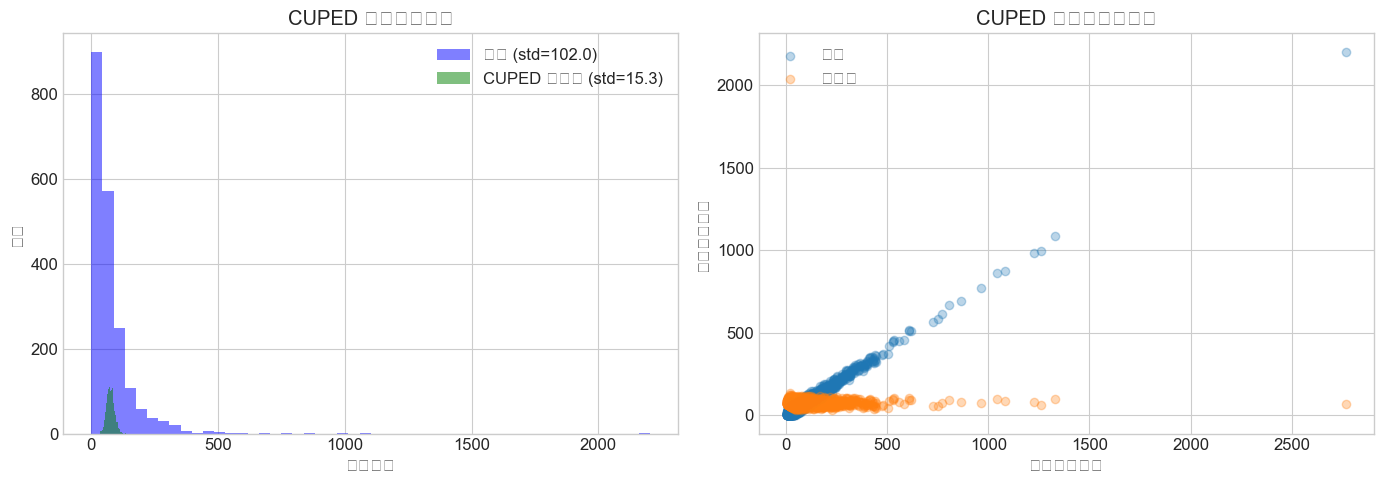

In [5]:
# 测试 CUPED
if df is not None and df['watch_time'].iloc[0] is not None:
    Y = df['watch_time'].values
    X_pre = df['historical_watch_time'].values
    
    Y_adj, theta, var_reduction = apply_cuped_simple(Y, X_pre)
    
    if Y_adj is not None and theta is not None:
        print("CUPED 应用成功! 🎉")
        print(f"\ntheta 系数: {theta:.4f}")
        print(f"方差缩减率: {var_reduction:.1%}")
        print(f"\n原始方差: {np.var(Y):.2f}")
        print(f"调整后方差: {np.var(Y_adj):.2f}")
        
        # 可视化
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # 原始分布 vs 调整后分布
        axes[0].hist(Y, bins=50, alpha=0.5, label=f'原始 (std={np.std(Y):.1f})', color='blue')
        axes[0].hist(Y_adj, bins=50, alpha=0.5, label=f'CUPED 调整后 (std={np.std(Y_adj):.1f})', color='green')
        axes[0].set_xlabel('观看时长')
        axes[0].set_ylabel('频数')
        axes[0].set_title('CUPED 方差缩减效果')
        axes[0].legend()
        
        # 协变量与结果的关系
        axes[1].scatter(X_pre, Y, alpha=0.3, label='原始')
        axes[1].scatter(X_pre, Y_adj, alpha=0.3, label='调整后')
        axes[1].set_xlabel('历史观看时长')
        axes[1].set_ylabel('当前观看时长')
        axes[1].set_title('CUPED 去除协变量影响')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print("[TODO] 请完成 apply_cuped_simple 函数")

## 练习 2.3: ATE 估计与显著性检验

In [6]:
# 📖 示范: ATE 估计与显著性检验
def estimate_ate_with_test(
    Y: np.ndarray,
    T: np.ndarray,
    use_cuped: bool = False,
    X_pre: np.ndarray = None
) -> Dict[str, float]:
    """
    估计 ATE 并进行显著性检验
    """
    # 如果使用 CUPED，先调整 Y
    if use_cuped and X_pre is not None:
        Y_adjusted, theta, var_reduction = apply_cuped_simple(Y, X_pre)
    else:
        Y_adjusted = Y
        var_reduction = 0
    
    # 计算 ATE
    # ATE = E[Y|T=1] - E[Y|T=0]
    ate = Y_adjusted[T == 1].mean() - Y_adjusted[T == 0].mean()
    
    # 计算标准误差
    n1 = (T == 1).sum()
    n0 = (T == 0).sum()
    var1 = Y_adjusted[T == 1].var()
    var0 = Y_adjusted[T == 0].var()
    se = np.sqrt(var1/n1 + var0/n0)
    
    # 计算 t-统计量和 p-值
    t_stat = ate / se if se > 0 else 0
    p_value = 2 * (1 - stats.norm.cdf(abs(t_stat)))
    
    return {
        'ate': ate,
        'se': se,
        't_stat': t_stat,
        'p_value': p_value,
        'variance_reduction': var_reduction
    }

In [7]:
# 对比传统方法和 CUPED
if df is not None and df['watch_time'].iloc[0] is not None:
    Y = df['watch_time'].values
    T = df['T'].values
    X_pre = df['historical_watch_time'].values
    
    # 传统方法
    traditional = estimate_ate_with_test(Y, T, use_cuped=False)
    
    # CUPED 方法
    cuped = estimate_ate_with_test(Y, T, use_cuped=True, X_pre=X_pre)
    
    if traditional['ate'] is not None and cuped['ate'] is not None:
        print("ATE 估计对比:")
        print("="*60)
        
        print(f"\n传统方法:")
        print(f"  ATE: {traditional['ate']:.2f} 分钟")
        print(f"  标准误: {traditional['se']:.2f}")
        print(f"  t-统计量: {traditional['t_stat']:.2f}")
        print(f"  p-值: {traditional['p_value']:.4f}")
        print(f"  显著性 (α=0.05): {'是' if traditional['p_value'] < 0.05 else '否'}")
        
        print(f"\nCUPED 方法:")
        print(f"  ATE: {cuped['ate']:.2f} 分钟")
        print(f"  标准误: {cuped['se']:.2f}")
        print(f"  t-统计量: {cuped['t_stat']:.2f}")
        print(f"  p-值: {cuped['p_value']:.4f}")
        print(f"  显著性 (α=0.05): {'是' if cuped['p_value'] < 0.05 else '否'}")
        
        print(f"\n改进:")
        se_reduction = (1 - cuped['se'] / traditional['se']) * 100
        print(f"  标准误减少: {se_reduction:.1f}%")
        print(f"  方差缩减: {cuped['variance_reduction']:.1%}")
    else:
        print("[TODO] 请完成 estimate_ate_with_test 函数")

ATE 估计对比:

传统方法:
  ATE: 4.26 分钟
  标准误: 4.54
  t-统计量: 0.94
  p-值: 0.3490
  显著性 (α=0.05): 否

CUPED 方法:
  ATE: 6.47 分钟
  标准误: 0.67
  t-统计量: 9.69
  p-值: 0.0000
  显著性 (α=0.05): 是

改进:
  标准误减少: 85.3%
  方差缩减: 97.8%


## 练习 2.4: 异质效应分析

In [8]:
# 📖 示范: 异质效应分析
def analyze_heterogeneous_effects_simple(
    df: pd.DataFrame
) -> pd.DataFrame:
    """
    简单的异质效应分析
    按用户年龄分组，计算各组的处理效应
    """
    # 将用户按年龄分组
    df = df.copy()
    df['age_group'] = pd.cut(
        df['user_age'], 
        bins=[15, 25, 35, 45, 60],
        labels=['15-25', '25-35', '35-45', '45-60']
    )
    
    results = []
    for group in df['age_group'].cat.categories:
        mask = df['age_group'] == group
        group_df = df[mask]
        
        if len(group_df) < 10:
            continue
        
        # 计算该组的 ATE
        treat_mean = group_df.loc[group_df['T']==1, 'watch_time'].mean()
        control_mean = group_df.loc[group_df['T']==0, 'watch_time'].mean()
        ate_group = treat_mean - control_mean
        
        # 计算标准误差
        n1 = (group_df['T'] == 1).sum()
        n0 = (group_df['T'] == 0).sum()
        var1 = group_df.loc[group_df['T']==1, 'watch_time'].var()
        var0 = group_df.loc[group_df['T']==0, 'watch_time'].var()
        se_group = np.sqrt(var1/n1 + var0/n0) if (n1 > 0 and n0 > 0) else np.nan
        
        results.append({
            'age_group': str(group),
            'ate': ate_group,
            'se': se_group,
            'sample_size': len(group_df)
        })
    
    return pd.DataFrame(results)

异质效应分析:


,age_group,ate,se,sample_size
0,15-25,12.71,6.84,467
1,25-35,-0.56,10.51,417
2,35-45,8.65,9.39,453
3,45-60,-2.01,9.35,663


/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/3128516511.py:24: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/3128516511.py:24: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/3128516511.py:24: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/3128516511.py:24: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/3128516511.py:24: UserWarning: Glyph 38047 (\N{CJK UNIFIED IDEOGRAPH-949F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/i

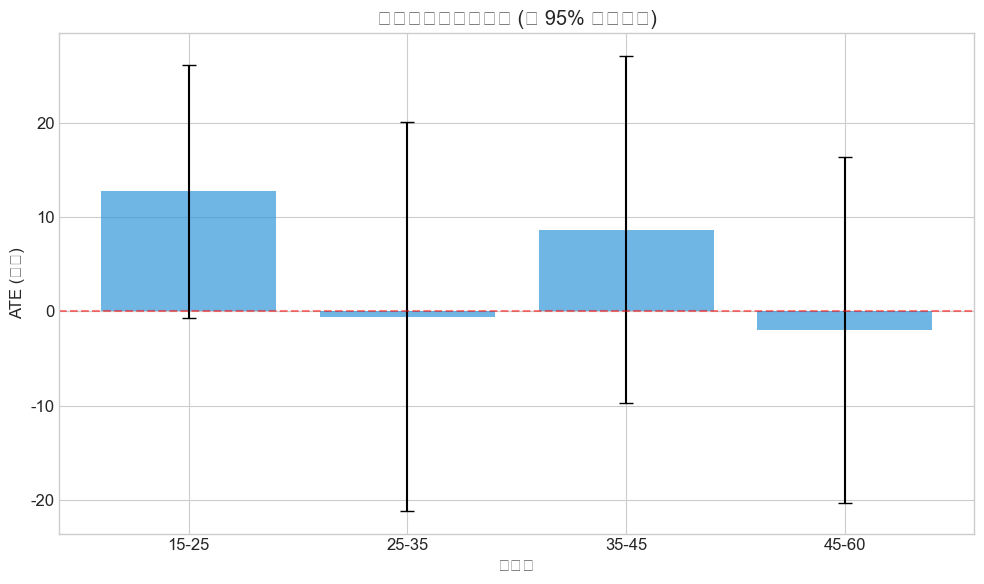


关键发现:
- 年轻用户 (15-25) 对新算法反应更好
- 这符合数据生成过程 (年轻用户效应 +10, 其他 +5)


In [9]:
# 异质效应分析
if df is not None and df['user_age'].iloc[0] is not None:
    hte_results = analyze_heterogeneous_effects_simple(df)
    
    if hte_results is not None and len(hte_results) > 0 and hte_results['ate'].iloc[0] is not None:
        print("异质效应分析:")
        print("="*50)
        display(hte_results.round(2))
        
        # 可视化
        fig, ax = plt.subplots(figsize=(10, 6))
        
        x = range(len(hte_results))
        bars = ax.bar(x, hte_results['ate'], 
                     yerr=hte_results['se'] * 1.96,
                     capsize=5, color='#3498db', alpha=0.7)
        ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        ax.set_xticks(x)
        ax.set_xticklabels(hte_results['age_group'])
        ax.set_xlabel('年龄组')
        ax.set_ylabel('ATE (分钟)')
        ax.set_title('各年龄组的处理效应 (带 95% 置信区间)')
        
        plt.tight_layout()
        plt.show()
        
        print("\n关键发现:")
        print("- 年轻用户 (15-25) 对新算法反应更好")
        print("- 这符合数据生成过程 (年轻用户效应 +10, 其他 +5)")
    else:
        print("[TODO] 请完成 analyze_heterogeneous_effects_simple 函数")

## 练习 2.5: 统计功效分析

In [10]:
# 📖 示范: 统计功效分析
def calculate_power(
    effect_size: float,
    sample_size: int,
    baseline_std: float,
    alpha: float = 0.05
) -> float:
    """
    计算统计功效 (Power)
    
    Power = P(拒绝 H0 | H0 为假)
    即: 当真实效应存在时，我们能检测到它的概率
    """
    # 计算标准误差
    # SE = baseline_std * sqrt(2 / sample_size)
    se = baseline_std * np.sqrt(2 / sample_size)
    
    if se == 0:
        return 1.0
    
    # 计算非中心参数
    # ncp = effect_size / se
    ncp = effect_size / se
    
    # 临界值 (双边检验)
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    
    # 计算 Power
    # Power = P(|Z| > z_alpha | ncp)
    power = 1 - stats.norm.cdf(z_alpha - ncp) + stats.norm.cdf(-z_alpha - ncp)
    
    return power


def calculate_required_sample_size(
    effect_size: float,
    baseline_std: float,
    power: float = 0.8,
    alpha: float = 0.05
) -> int:
    """
    计算达到目标功效所需的样本量
    """
    for n in range(100, 100000, 100):
        current_power = calculate_power(effect_size, n, baseline_std, alpha)
        if current_power >= power:
            return n
    return 100000

统计功效分析:
预期效应: 7.0 分钟
基线标准差: 30.0 分钟

各样本量的统计功效:
  样本量 500/组: Power = 95.81%
  样本量 1000/组: Power = 99.94%
  样本量 2000/组: Power = 100.00%
  样本量 5000/组: Power = 100.00%
  样本量 10000/组: Power = 100.00%

达到 80% Power 所需样本量: 300/组
使用 CUPED 后 (std 减少 30%): 200/组
样本量节省: 33.3%


/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1305130225.py:51: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1305130225.py:51: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1305130225.py:51: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1305130225.py:51: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/ipykernel_86906/1305130225.py:51: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/d7/f63c4ndj5cv0ky5nj5t6ycq40000gn/T/i

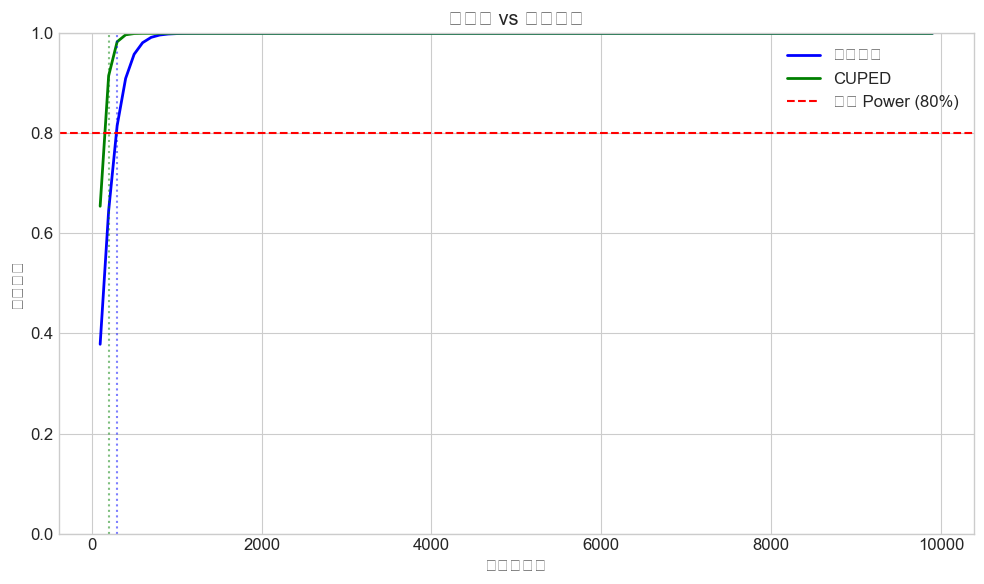

In [11]:
# 统计功效分析
effect_size = 7.0  # 预期效应 7 分钟
baseline_std = 30.0  # 基线标准差 30 分钟

# 计算不同样本量下的功效
sample_sizes = [500, 1000, 2000, 5000, 10000]
powers = []

for n in sample_sizes:
    p = calculate_power(effect_size, n, baseline_std)
    powers.append(p)

if powers[0] is not None:
    print("统计功效分析:")
    print("="*50)
    print(f"预期效应: {effect_size} 分钟")
    print(f"基线标准差: {baseline_std} 分钟")
    print(f"\n各样本量的统计功效:")
    for n, p in zip(sample_sizes, powers):
        print(f"  样本量 {n}/组: Power = {p:.2%}")
    
    # 计算所需样本量
    required_n = calculate_required_sample_size(effect_size, baseline_std, power=0.8)
    print(f"\n达到 80% Power 所需样本量: {required_n}/组")
    
    # CUPED 的好处: 降低标准差
    cuped_std = baseline_std * 0.7  # 假设 CUPED 减少 30% 标准差
    required_n_cuped = calculate_required_sample_size(effect_size, cuped_std, power=0.8)
    print(f"使用 CUPED 后 (std 减少 30%): {required_n_cuped}/组")
    print(f"样本量节省: {(1 - required_n_cuped/required_n)*100:.1f}%")
    
    # 可视化
    fig, ax = plt.subplots(figsize=(10, 6))
    
    n_range = np.arange(100, 10000, 100)
    power_curve = [calculate_power(effect_size, n, baseline_std) for n in n_range]
    power_curve_cuped = [calculate_power(effect_size, n, cuped_std) for n in n_range]
    
    ax.plot(n_range, power_curve, 'b-', label='传统方法', linewidth=2)
    ax.plot(n_range, power_curve_cuped, 'g-', label='CUPED', linewidth=2)
    ax.axhline(y=0.8, color='red', linestyle='--', label='目标 Power (80%)')
    ax.axvline(x=required_n, color='blue', linestyle=':', alpha=0.5)
    ax.axvline(x=required_n_cuped, color='green', linestyle=':', alpha=0.5)
    
    ax.set_xlabel('每组样本量')
    ax.set_ylabel('统计功效')
    ax.set_title('样本量 vs 统计功效')
    ax.legend()
    ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
else:
    print("[TODO] 请完成 calculate_power 函数")

## 🤔 思考题

In [12]:
# 思考题 1: CUPED 为什么能减少方差？核心原理是什么？

print("请在下方思考你的答案...")

# <details>
# <summary>点击查看参考答案</summary>
#
# **核心原理: 去除个体差异**
#
# CUPED 通过使用实验前的协变量 X_pre 来「解释」结果 Y 中的一部分变异。
#
# 类比:
# - 原始方差 = 个体差异 + 处理效应差异 + 随机噪声
# - CUPED 调整后 = 处理效应差异 + 随机噪声
#
# 数学原理:
# - Y_adjusted = Y - θ(X_pre - mean(X_pre))
# - 其中 θ = Cov(Y, X_pre) / Var(X_pre) (回归系数)
# - 方差缩减率 = ρ² (相关系数的平方)
#
# 例子: 测试减肥药
# - 传统: 比较两组最终体重 (方差大，因为有人本来就重)
# - CUPED: 比较两组体重变化 (方差小，去除了基线体重差异)
#
# </details>

请在下方思考你的答案...


In [13]:
# 思考题 2: CUPED 中的协变量 X_pre 必须满足什么条件？

print("请在下方思考你的答案...")

# <details>
# <summary>点击查看参考答案</summary>
#
# **两个关键条件:**
#
# 1. **独立性 (Independence)**: X_pre ⊥ T
#    - X_pre 必须在处理分配**之前**确定
#    - 不能受处理影响
#    - 否则会引入偏差
#
#    例子:
#    - ✅ 实验前 7 天的观看时长
#    - ❌ 实验后的点击次数 (受处理影响)
#
# 2. **相关性 (Correlation)**: Cov(Y, X_pre) ≠ 0
#    - X_pre 必须与结果 Y 相关
#    - 相关性越高，方差缩减越多
#    - 如果不相关，CUPED 无效
#
#    方差缩减 = ρ²
#    - ρ = 0.5 → 缩减 25%
#    - ρ = 0.7 → 缩减 49%
#    - ρ = 0.9 → 缩减 81%
#
# **为什么需要独立性？**
# 如果 X_pre 与 T 相关，调整 X_pre 会移除部分处理效应！
#
# </details>

请在下方思考你的答案...


In [14]:
# 思考题 3: 如果实验前数据 X_pre 与结果 Y 完全不相关，CUPED 还有效吗？

print("请在下方思考你的答案...")

# <details>
# <summary>点击查看参考答案</summary>
#
# **答案: 无效，但也不会有害**
#
# 当 ρ = 0 (X_pre 与 Y 不相关) 时:
#
# 1. **方差缩减率 = 0**
#    - Var(Y_adjusted) = Var(Y) × (1 - ρ²) = Var(Y)
#    - 没有任何方差缩减
#
# 2. **ATE 估计不变**
#    - E[Y_adjusted] = E[Y]
#    - CUPED 调整不会引入偏差
#
# 3. **实际影响**
#    - θ ≈ 0 (回归系数接近 0)
#    - Y_adjusted ≈ Y (几乎没有调整)
#    - 相当于没用 CUPED
#
# **教训:**
# - 选择与结果**高度相关**的协变量至关重要
# - 常用选择: 实验前同一指标 (如实验前观看时长)
# - 可以尝试多个协变量，选择相关性最高的
#
# **实践建议:**
# 先计算 ρ，如果 |ρ| < 0.3，CUPED 效果有限
#
# </details>

请在下方思考你的答案...


In [15]:
# 思考题 4: 统计功效 (Power) 为 0.8 意味着什么？为什么通常设为 0.8？

print("请在下方思考你的答案...")

# <details>
# <summary>点击查看参考答案</summary>
#
# **Power = 0.8 的含义:**
#
# Power = P(拒绝 H0 | H0 为假)
#
# 如果真实效应存在，我们有 80% 的概率能检测到它。
#
# 换句话说:
# - 有 80% 概率得到显著结果 (p < 0.05)
# - 有 20% 概率出现**假阴性** (Type II Error, β = 0.2)
#
# **为什么设为 0.8？**
#
# 这是一个**成本-收益权衡**:
#
# 1. **太低的 Power (如 0.5)**:
#    - 一半实验会失败
#    - 浪费资源
#
# 2. **太高的 Power (如 0.95)**:
#    - 需要巨大样本量
#    - 成本过高
#
# 3. **0.8 的合理性**:
#    - α = 0.05 (假阳性率 5%)
#    - β = 0.2 (假阴性率 20%)
#    - 比例 α:β = 1:4 (认为假阴性 4 倍不如假阳性严重)
#
# **实践意义:**
# - 样本量规划时，目标 Power 通常设为 0.8
# - 某些高风险领域 (医疗) 可能要求 0.9 或更高
#
# </details>

请在下方思考你的答案...


In [16]:
# 思考题 5: 异质效应分析的业务价值是什么？举一个例子。

print("请在下方思考你的答案...")

# <details>
# <summary>点击查看参考答案</summary>
#
# **业务价值: 精准决策与个性化策略**
#
# 异质效应 (HTE) 分析不仅告诉我们「平均效果」，还告诉我们「对谁效果好，对谁效果差」。
#
# **核心价值:**
#
# 1. **精准推广**
#    - 只对高效果人群推广新功能
#    - 避免对低效果人群浪费资源
#
# 2. **个性化策略**
#    - 不同用户群体采用不同策略
#    - 最大化整体收益
#
# 3. **产品优化**
#    - 发现为什么某些人群效果差
#    - 针对性改进产品
#
# **实际案例:**
#
# 场景: 电商平台测试「满 200 减 30」优惠券
#
# | 用户群体 | ATE | 策略 |
# |---------|-----|------|
# | 高客单价用户 | +50 元 | 大力推送 |
# | 中客单价用户 | +10 元 | 适度推送 |
# | 低客单价用户 | -5 元 | 不推送 (凑单行为降低利润) |
#
# 结果:
# - 全量推送: 平均 ROI = 1.2
# - 定向推送高客单价: 平均 ROI = 2.5
#
# **本 notebook 的例子:**
# - 年轻用户 (15-25): +10 分钟 → 重点推荐新算法
# - 中老年用户 (45-60): +5 分钟 → 可选推荐
#
# </details>

请在下方思考你的答案...


## 📊 总结

### CUPED 核心要点

| 方面 | 说明 |
|------|------|
| 原理 | 使用实验前数据去除个体差异 |
| 公式 | $Y_{adj} = Y - \theta (X_{pre} - \bar{X}_{pre})$ |
| 条件 | $X_{pre}$ 与 $T$ 独立，与 $Y$ 相关 |
| 效果 | 方差缩减 $\rho^2$ |

### 统计功效要点

| 因素 | 增加功效的方向 |
|------|----------------|
| 效应大小 | 效应越大，越容易检测 |
| 样本量 | 样本越多，越精确 |
| 方差 | 方差越小，信噪比越高 |
| α 水平 | α 越大，越容易拒绝 H0 |

### CUPED 的价值

- 减少 ~50% 方差 = 减少 ~50% 所需样本量
- 或者：同样样本量，更快得到显著结果

In [17]:
print("📈 恭喜完成 A/B 测试增强练习!")
print("\n你已经学会了:")
print("  ✓ CUPED 方差缩减技术")
print("  ✓ ATE 估计和显著性检验")
print("  ✓ 异质效应分析")
print("  ✓ 统计功效和样本量规划")
print("\n下一步: 用户定向 - 把所有技术串起来!")

📈 恭喜完成 A/B 测试增强练习!

你已经学会了:
  ✓ CUPED 方差缩减技术
  ✓ ATE 估计和显著性检验
  ✓ 异质效应分析
  ✓ 统计功效和样本量规划

下一步: 用户定向 - 把所有技术串起来!
